<a href="https://colab.research.google.com/github/Maisho20/PCVK_Sabbaha-Naufal-Erwanda/blob/main/Pertemuan%2011/Week_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama: Sabbaha Naufal Erwanda**

**Kelas: TI-3A**

**NIM: 2141720221**

# Praktikum 10
Metode Deteksi Objek: TemplateMatching, Edge Detection, CornerDetection,GridDetection, ContourDetection

#### 1. Import database dari google drive dan import library

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# connect google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### 2. Metode template matching pada OpenCV dengan menggunakan gambar cats_and_bunnies.jpg dan cat2_templatejpg.jpg sebagai templatenya dengan google colab

Menggunakan Library OpenCV:

**cv.matchTemplate()**, dengan parameter:
* **image**: Citra input
* **templ**: Template yang dicari, ukurannya tidak boleh lebih besar dari citra input
* **method**: metode dari template matching

Jenis metode template matching di openCV:
1. TM_SQDIFF
2. TM_SQDIFF_NORMED
3. TM_CCORR
4. TM_CCORR_NORMED
5. TM_CCOEFF
6. TM_CCOEFF_NORMED

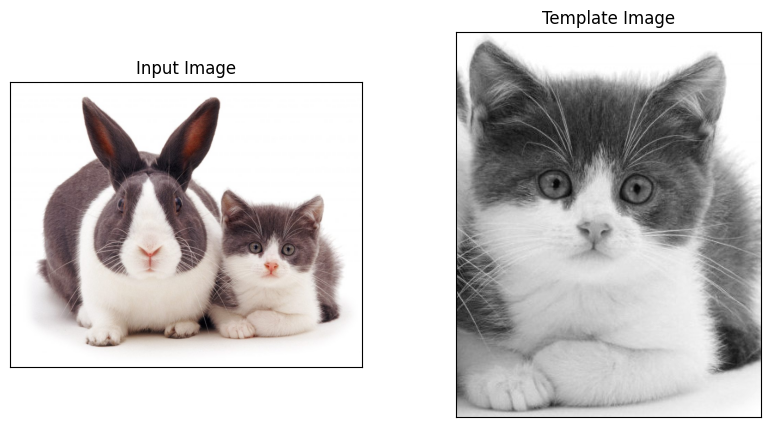

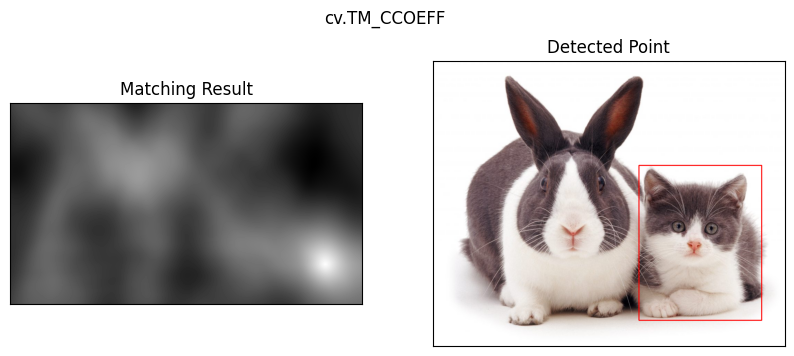

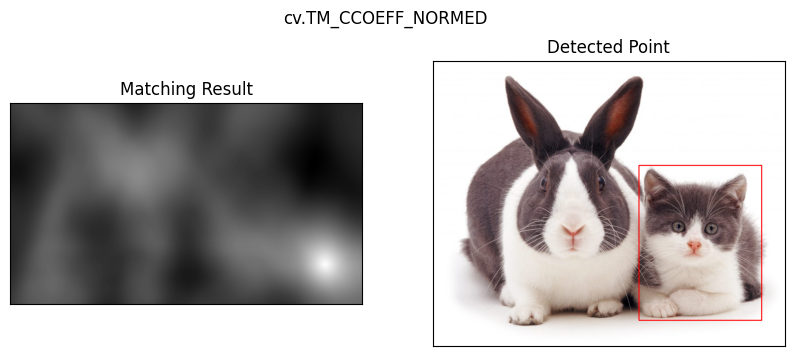

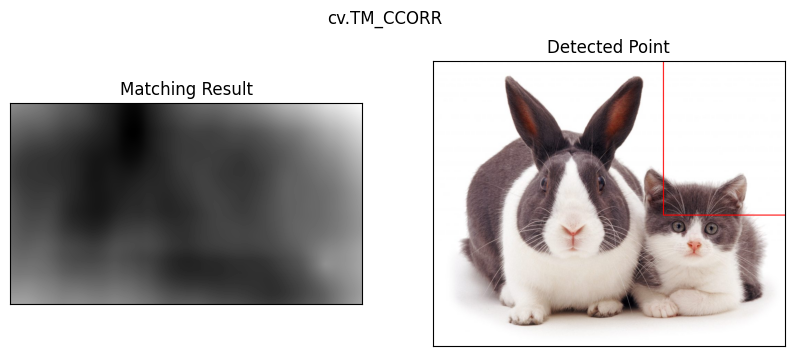

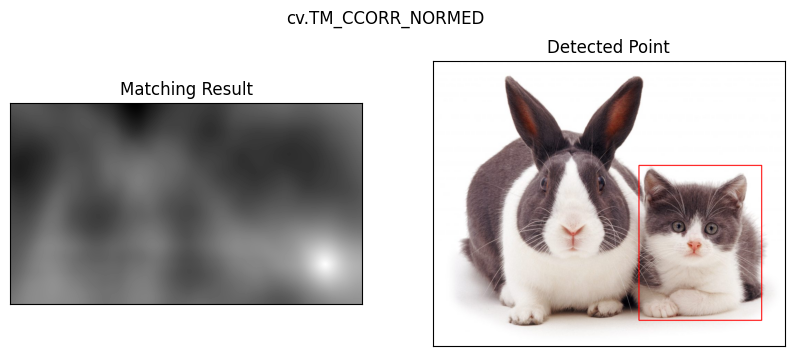

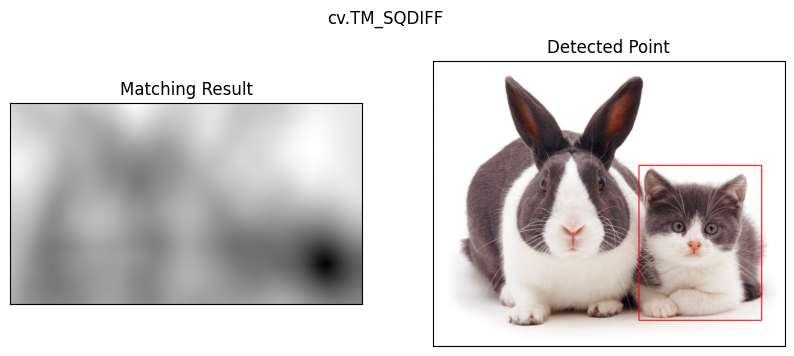

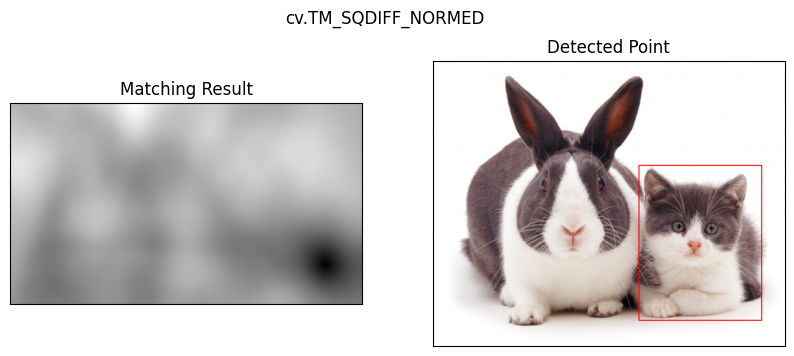

In [3]:
# Load the images
image = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/img/cats_and_bunnies.jpg')
template = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/img/cat2_template.jpg')

# Convert the image and template to grayscale for template matching
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
template_gray = cv.cvtColor(template, cv.COLOR_BGR2GRAY)

# Store width and height of template in w and h
w, h = template_gray.shape[::-1]

# List to store all the methods available in cv for template matching
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR', 'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

# Original Image
plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB), cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv.cvtColor(template, cv.COLOR_BGR2GRAY), cmap='gray')
plt.title('Template Image'), plt.xticks([]), plt.yticks([])
plt.show()

for meth in methods:
    img = image.copy()
    method = eval(meth)

    # Apply template matching
    res = cv.matchTemplate(image_gray, template_gray, method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img, top_left, bottom_right, (0, 0, 255), 2)

    plt.figure(figsize=(10,4))
    plt.subplot(121), plt.imshow(res, cmap='gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

#### 3. Konsep template matching tanpa menggunakan library OpenCV untuk multiple object, menggunakan gambar bahrain.jpg untuk citra masukan dan bahrain-template.jpg sebagai citra template

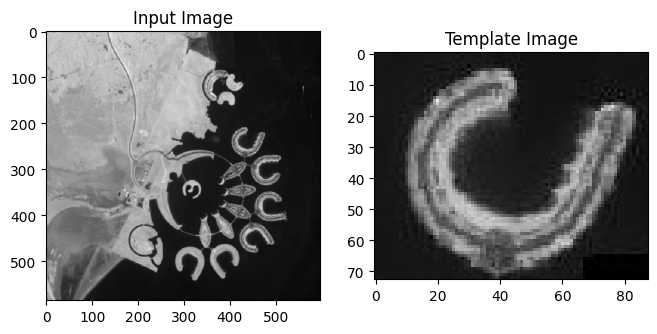

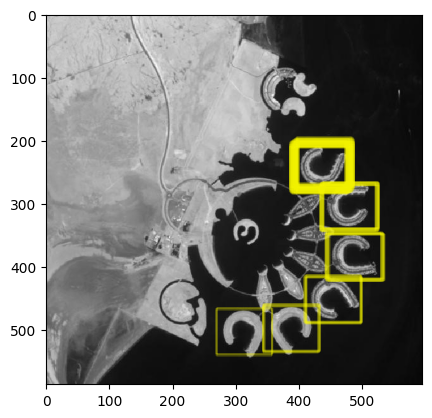

In [4]:
# Load the input image and the template

input_image = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/img/bahrain.jpg', 0)
template = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/img/bahrain-template.jpg', 0)

# Display the input image, template, and detected point using matplotlib
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.imshow(cv.cvtColor(input_image, cv.COLOR_BGR2RGB))
plt.title('Input Image')

plt.subplot(132)
plt.imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB))
plt.title('Template Image')

# library untuk mencocokkan beberapa gambar yang sama
from skimage.feature import match_template

# Hitung kemiripan citra dengan citra template
result = match_template(input_image, template)

# Tentukan threshold untuk menentukan hasil match
threshold = 0.45 # menentukan threshold untuk menentukan hasil matc
locations = np.where(result >= threshold)

# Plot hasil match
fig, ax = plt.subplots()
ax.imshow(input_image, cmap=plt.cm.gray)
# ax.set_axis_off()
height, width = template.shape
for loc in zip(*locations[::-1]): # iterasi pada setiap lokasi yang ditemukan
    rect = plt.Rectangle(loc, width, height, edgecolor='yellow', facecolor='none', linewidth=0.1)
    ax.add_patch(rect)

plt.show()

#### 4. Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian Edge Detection pada OpenCV dengan menggunakan gambar car-park.jpg

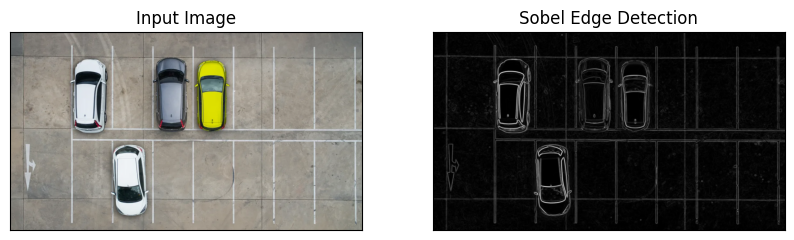

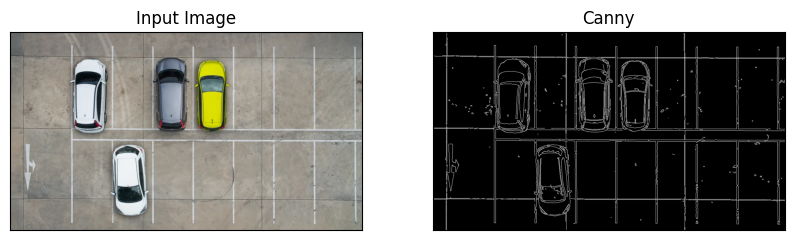

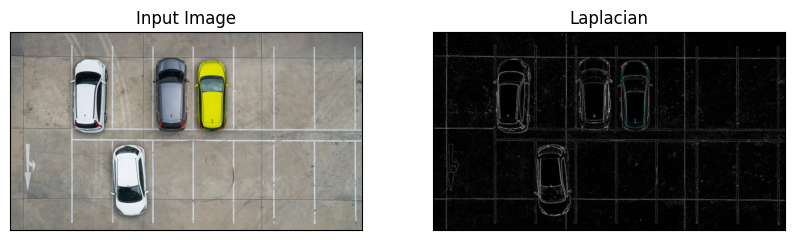

In [5]:
# Load the image
img = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/img/car-park.jpg')

# Convert the image to grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Apply Sobel edge detection
sobelx = cv.Sobel(gray, cv.CV_64F, 1, 0, ksize=5)
sobely = cv.Sobel(gray, cv.CV_64F, 0, 1, ksize=5)
sobel_magnitude = cv.magnitude(sobelx, sobely)

# Apply Canny edge detection
edges = cv.Canny(gray, 100, 200)

# Apply Laplacian Edge Detection
laplacian = cv.Laplacian(img, ddepth=cv.CV_64F)
laplacian_abs = cv.convertScaleAbs(laplacian)

# Plot the results
plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB), cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(sobel_magnitude, cmap='gray')
plt.title('Sobel Edge Detection'), plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB), cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(edges, cmap='gray')
plt.title('Canny'), plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB), cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(laplacian_abs, cmap='gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.show()

#### 5. Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection pada OpenCV dengan menggunakan gambar chess-board.jpg

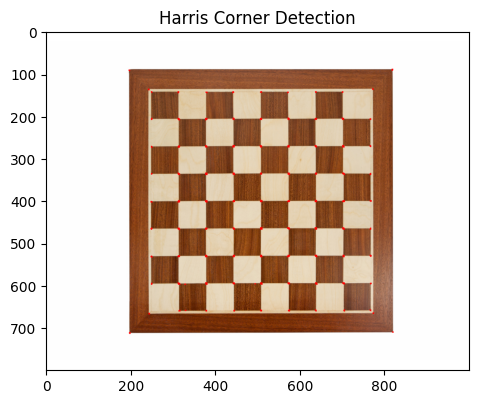

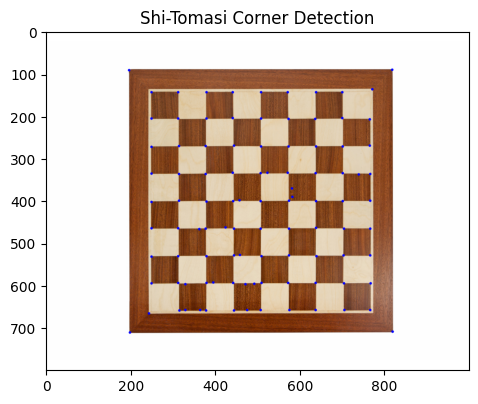

In [6]:
# Load the input image
image = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/img/chess-board.jpg')
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Harris Corner Detection
harris_corners = cv.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)
harris_corners = cv.dilate(harris_corners, None)

# Shi-Tomasi Corner Detection
corners = cv.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.01, minDistance=10)

# Draw Harris corners on the image
image_harris = image.copy()
image_harris[harris_corners > 0.01 * harris_corners.max()] = [0, 0, 255]

# Draw Shi-Tomasi corners on the image
image_shi_tomasi = image.copy()
for corner in corners:
    x, y = corner[0]
    cv.circle(image_shi_tomasi, (int(x), int(y)), 3, 255, -1)

# Display the original image and the images with detected corners
plt.figure(figsize=(12, 12))
plt.subplot(121)
plt.imshow(cv.cvtColor(image_harris, cv.COLOR_BGR2RGB))
plt.title('Harris Corner Detection')

plt.figure(figsize=(12, 12))
plt.subplot(121)
plt.imshow(cv.cvtColor(image_shi_tomasi, cv.COLOR_BGR2RGB))
plt.title('Shi-Tomasi Corner Detection')

plt.show()

#### 6. Implementasikan metode Hough Transform pada OpenCV dengan menggunakan gambar sudoku.jpg

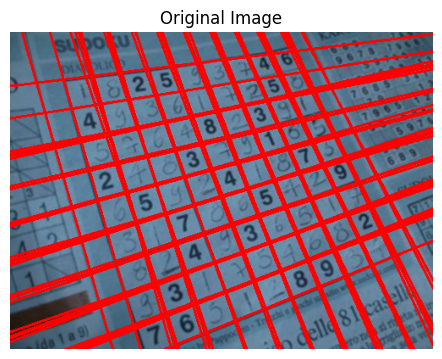

In [7]:
import cv2

# Load image
image = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/img/sudoku.jpg')

# Apply Canny edge detection
edges = cv2.Canny(image, 90, 150, apertureSize=3)

# Apply Hough Transform to detect lines
lines = cv2.HoughLines(edges, 1, np.pi / 180, threshold=150)

# Create a copy of the original image
# image_with_lines = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

# Draw the detected lines on the image with red color
for rho, theta in lines[:, 0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

# Display the image with detected grid lines in red
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.show()

#### 7. Implementasikan fungsi findContours() pada OpenCV untuk contour detection dengan menggunakan gambar laptop.jpg

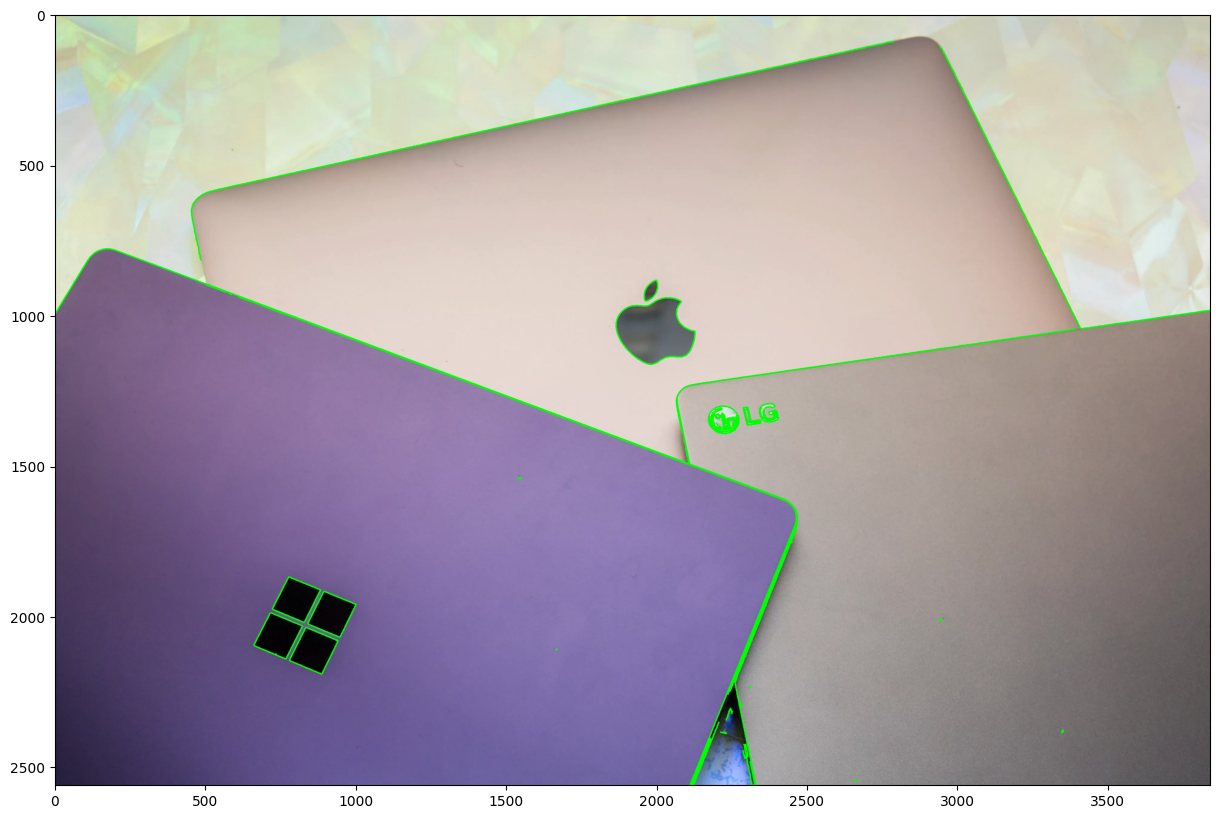

In [8]:
# Load the input image
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/img/laptop.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply edge detection
edges = cv2.Canny(gray, 50, 200, apertureSize=3)

# Find contours
contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours
cv2.drawContours(img, contours, -1, (0, 255, 0), 3)

# Display the input image with the detected contours
plt.figure(figsize=(20,10))
plt.imshow(img)


---

## **Pengayaan Materi KTP**



**Import Library dan data**

In [9]:
import cv2
import os

ktp = cv2.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/img/KTP/ktp4.png')

**Tambahkan kode lokalisasi dataset dan lakukan pembacaan file name di dalam direktori dataset tersebut**

In [10]:
# Lokasi hasil pelat
path_plate = '/content/drive/MyDrive/Colab Notebooks/PCVK/img/KTP'

# Looping file di direktori
for name_file in sorted(os.listdir(path_plate)):
 src = cv2.imread(os.path.join(path_plate, name_file))
 blurred = src.copy()
 gray = blurred.copy()

**Masih pada looping file direktori, terapkan Gaussian Blur untuk setiap file supaya noise pickle dapat direduksi**

In [11]:
# Filtering
for i in range(10):
    blurred = cv2.GaussianBlur(src, (5, 5), 0.5)

**Lakukan konversi grayscale untuk setiap hasil citra yang tereduksi noise dan lanjutkan dengan binerisasi citra**

160.0 (636, 996)


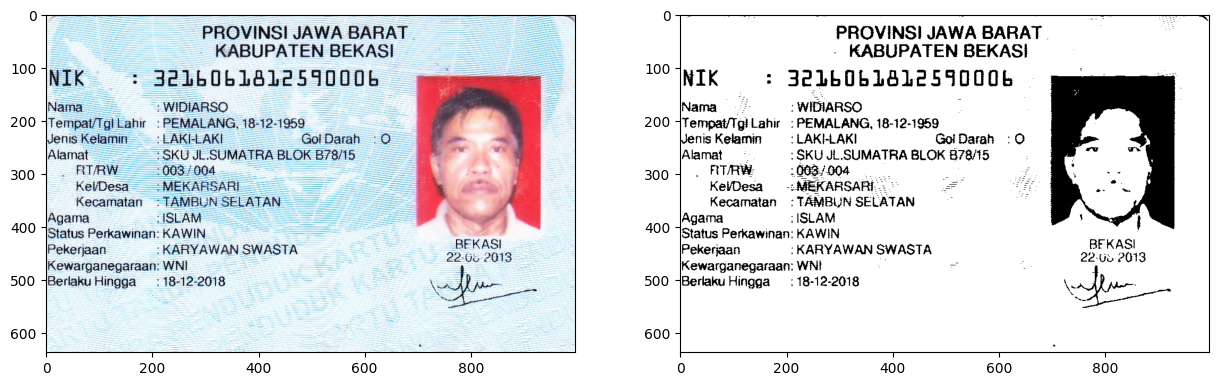

In [12]:
# Ubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY
+ cv2.THRESH_OTSU)
print(ret, bw.shape)

# Tampilkan gambar asli dan hasil deteksi tepi
f, axarr = plt.subplots(1,2,figsize=(15,5))
axarr[0].imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
axarr[1].imshow(bw, cmap='gray')
plt.show()

**Terapkan morfologi untuk setiap citra yang telah mengalami binerisasi supaya setiap karakter atau obyek tidak berhimpitan.**

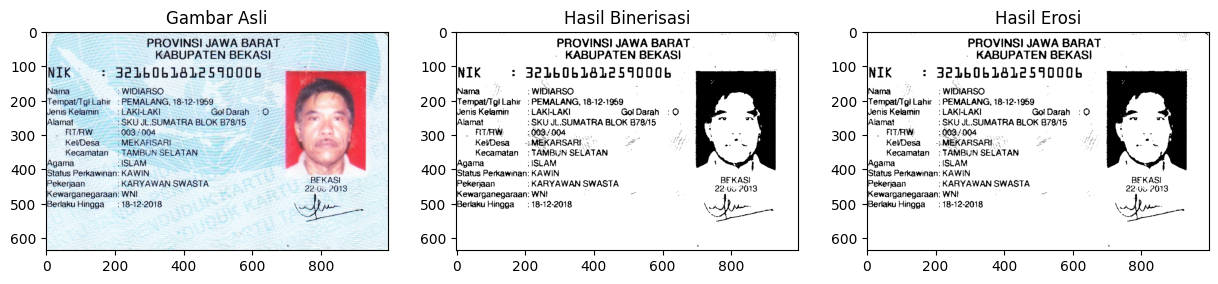

In [13]:
# Ubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Terapkan operasi morfologi erosi
erode = cv2.erode(bw.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))

# Tampilkan gambar asli, hasil deteksi tepi, dan hasil erosi
f, axarr = plt.subplots(1, 3, figsize=(15, 5))
axarr[0].imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
axarr[0].set_title("Gambar Asli")
axarr[1].imshow(bw, cmap='gray')
axarr[1].set_title("Hasil Binerisasi")
axarr[2].imshow(erode, cmap='gray')
axarr[2].set_title("Hasil Erosi")
plt.show()

**Terapkan ekstraksi kontur untuk untuk mendapatkan semua kontur setiap karakter/obyek.**

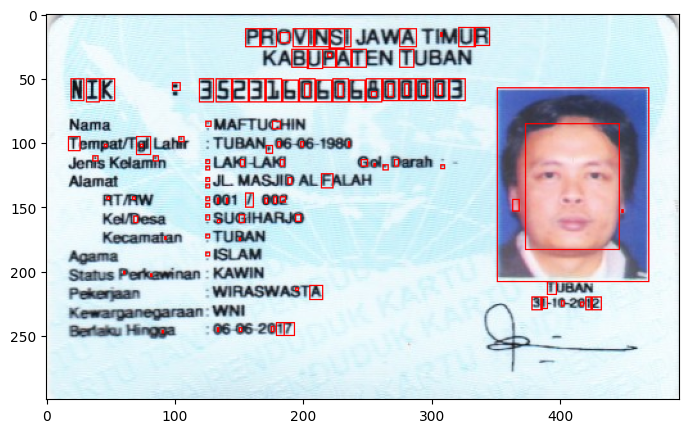

In [14]:
# Load the input image
ktp = cv2.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/img/KTP/ktp4.png')

blurred = cv2.GaussianBlur(ktp, (5, 5), 0.5)

gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

erode = cv2.erode(bw.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv2.findContours(erode.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 4 and w >= 1 and float(ras) <= 1:
      cv2.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 2 and w >= 1 and float(ras) <= 1:
      cv2.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

plt.figure(figsize=(10,5))
plt.imshow(cv2.cvtColor(ktp, cv2.COLOR_BGR2RGB))


---
# Tugas Praktikum
---
Kelompok 5:
1. Dandy Wahyu Syahputra (2141720002)
2. Muhammad Hatta (2141720021)
3. Sabbaha Naufal Erwanda (2141720221)

**Kelas: TI-3A**

**Load Data**

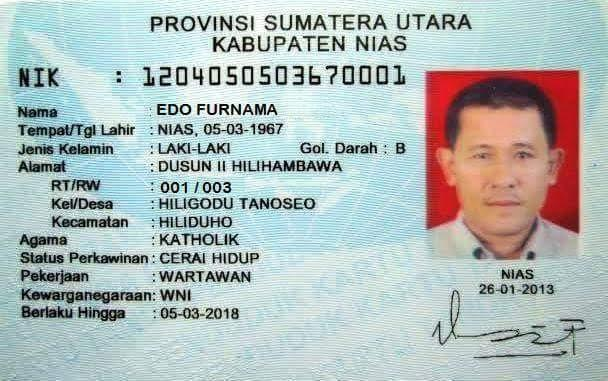

In [15]:
from google.colab.patches import cv2_imshow

ktp = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/img/KTP/ktp5.png')
cv2_imshow(ktp)

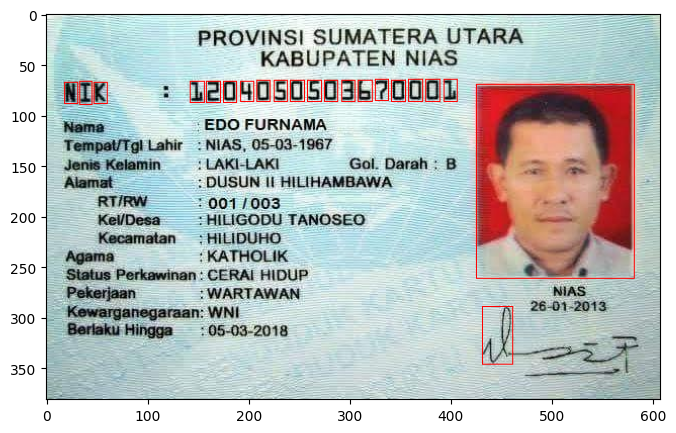

In [16]:
blurred = cv2.GaussianBlur(ktp, (5, 5), 0.5)

gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

erode = cv2.erode(bw.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv2.findContours(erode.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
      cv2.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 20 and w >= 10 and float(ras) <= 1:
      cv2.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

plt.figure(figsize=(10,5))
plt.imshow(cv2.cvtColor(ktp, cv2.COLOR_BGR2RGB))